In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [15]:
import os
dataset_path = "/content/drive/MyDrive/criminal_dataset/"  # Update with actual folder name
print(os.listdir(dataset_path))  # Check if files are there

['B02982.jpg', 'B03062.jpg', 'B03019.jpg', 'B02991.jpg', 'B03005.jpg', 'B02997.jpg', 'B03040.jpg', 'B03004.jpg', 'B03054.jpg', 'B03023.jpg', 'B02995.jpg', 'B03164.jpg', 'B03141.jpg', 'B03120.jpg', 'B03174.jpg', 'B03084.jpg', 'B03069.jpg', 'B03101.jpg', 'B03158.jpg', 'B03186.jpg', 'B03118.jpg', 'B03066.jpg', 'B03191.jpg', 'B03234.jpg', 'B03208.jpg', 'B03244.jpg', 'B03278.jpg', 'B03296.jpg', 'B03292.jpg', 'B03299.jpg', 'B03254.jpg', 'B03340.jpg', 'B03368.jpg', 'B03336.jpg', 'B03314.jpg', 'B03327.jpg', 'B03301.jpg', 'B03386.jpg', 'B03303.jpg', 'B03381.jpg', 'B03363.jpg', 'B03335.jpg', 'B03378.jpg', 'B03541.jpg', 'B03462.jpg', 'B03495.jpg', 'B03436.jpg', 'B03392.jpg', 'B03390.jpg', 'B03401.jpg', 'B03524.jpg', 'B03536.jpg', 'B03414.jpg', 'B03501.jpg', 'B03439.jpg', 'B03490.jpg', 'B03459.jpg', 'B03547.jpg', 'B03438.jpg', 'B03593.jpg', 'B03567.jpg', 'B03620.jpg', 'B03708.jpg', 'B03596.jpg', 'B03678.jpg', 'B03674.jpg', 'B03705.jpg', 'B03643.jpg', 'B03627.jpg', 'B03577.jpg', 'B03557.jpg', 'B036

In [16]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

img_size = (128, 128)  # Resize images to this size

X = []
for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is not None:
        img = cv2.resize(img, img_size)  # Resize
        X.append(img)

X = np.array(X) / 255.0  # Normalize pixel values
X = X.reshape(-1, img_size[0], img_size[1], 1)  # Reshape for CNN

# Dummy labels (if not available, you can generate pseudo-labels)
y = np.arange(len(X)) % 10  # Example: Assigning 10 different labels arbitrarily
y = to_categorical(y, num_classes=10)

# Split dataset
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(img_size[0], img_size[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,724,682 (14.21 MB)

 Trainable params: 3,724,682 (14.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.0937 - loss: 3.3688 - val_accuracy: 0.0855 - val_loss: 2.3032
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.0928 - loss: 2.3030 - val_accuracy: 0.0826 - val_loss: 2.3033
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1102 - loss: 2.3021 - val_accuracy: 0.0737 - val_loss: 2.3045
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.1467 - loss: 2.2985 - val_accuracy: 0.0767 - val_loss: 2.3086
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1894 - loss: 2.2874 - val_accuracy: 0.1091 - val_loss: 2.3202
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1816 - loss: 2.2227 - val_accuracy: 0.1209 - val_loss: 2.3336
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2675 - loss: 2.1019 - val_accuracy: 0.1209 - val_loss: 2.4168
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3389 - loss: 1.9270 - val_accuracy: 0.1150 -

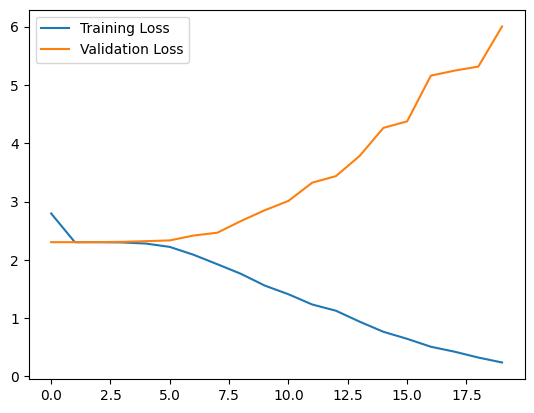

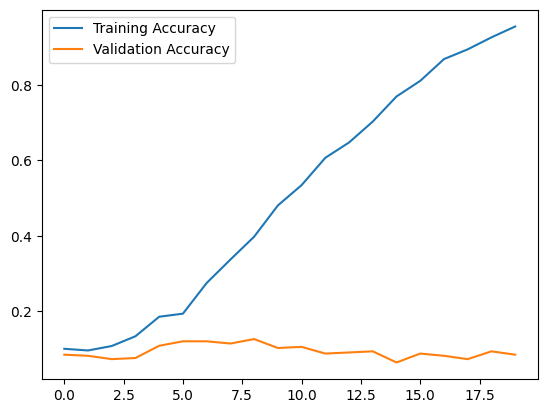

In [17]:
history = model.fit(train_X, train_Y, batch_size=64, epochs=20, validation_split=0.2)

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [19]:
score = model.evaluate(test_X, test_Y, verbose=1)
print('\nKeras CNN accuracy:', score[1], '\n')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0885 - loss: 5.9047

Keras CNN accuracy: 0.1037735864520073 



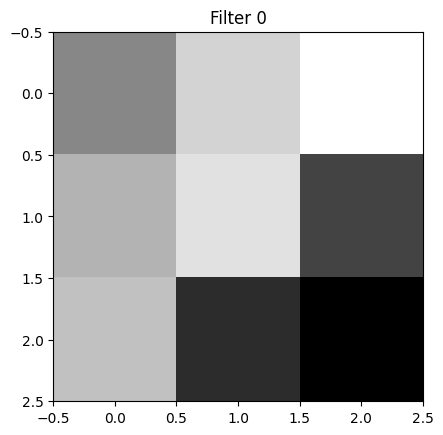

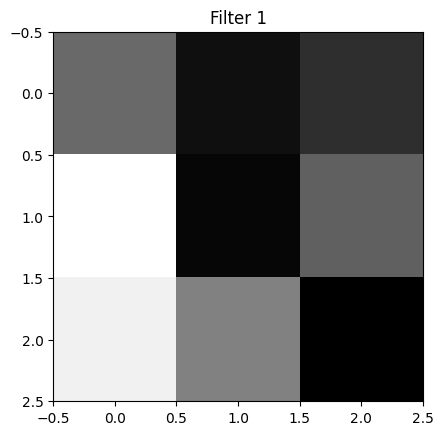

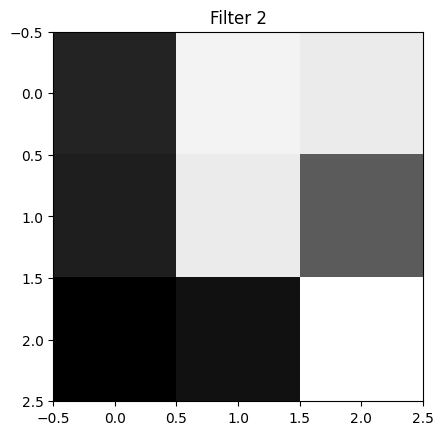

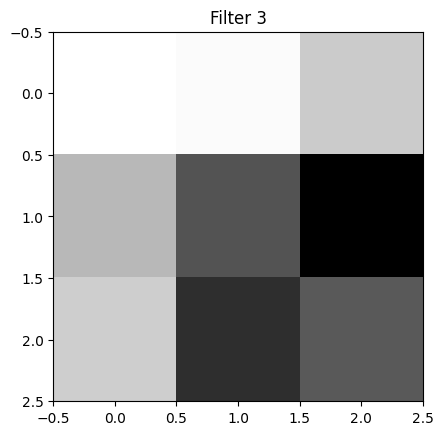

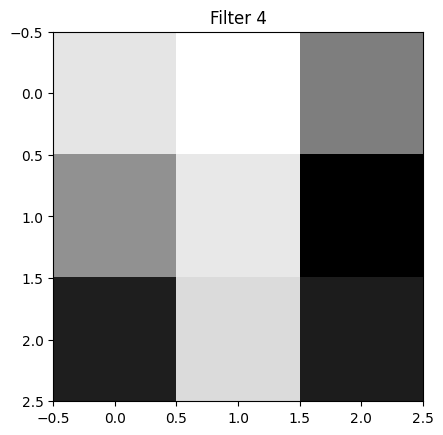

In [20]:
filters, biases = model.layers[0].get_weights()

# Visualize first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f'Filter {i}')
    plt.show()


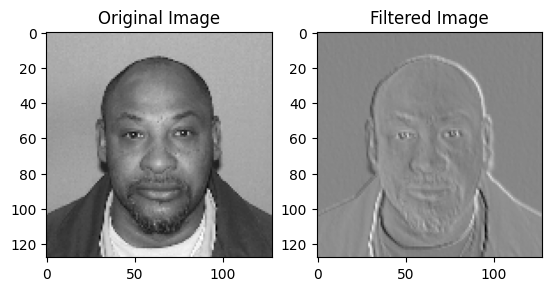

In [21]:
from scipy import signal

# Select an image
im = train_X[10].reshape(img_size[0], img_size[1])

# Select a filter from the first layer
filt = filters[:, :, 0, 1]

# Apply convolution
filtered_image = signal.convolve2d(im, filt, boundary='symm', mode='same')

# Display original and filtered images
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.0992 - loss: 6.1490 - val_accuracy: 0.0944 - val_loss: 2.3174
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0849 - loss: 2.3100 - val_accuracy: 0.1180 - val_loss: 2.3024
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0976 - loss: 2.3034 - val_accuracy: 0.0914 - val_loss: 2.3024
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1062 - loss: 2.3025 - val_accuracy: 0.0914 - val_loss: 2.3028
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1044 - loss: 2.3022 - val_accuracy: 0.0914 - val_loss: 2.3030
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1044 - loss: 2.3028 - val_accuracy: 0.0914 - val_loss: 2.3032
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0954 - loss: 2.3024 - val_accuracy: 0.0855 - val_loss: 2.3033
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1122 - loss: 2.3016 - val_accuracy: 0.0855 - val_lo

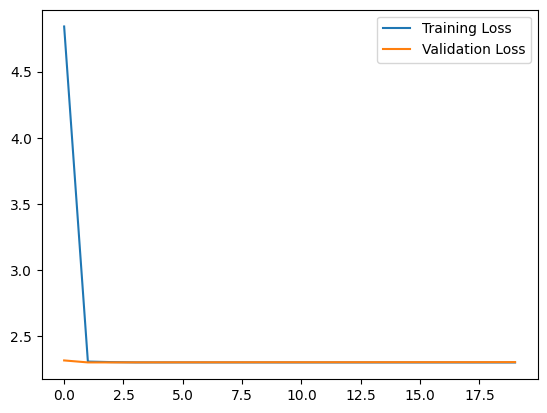

In [22]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# Fully connected model
fc_model = Sequential()
fc_model.add(Flatten(input_shape=(img_size[0], img_size[1], 1)))
fc_model.add(Dense(256, activation='relu'))
fc_model.add(Dropout(0.3))
fc_model.add(Dense(128, activation='relu'))
fc_model.add(Dense(10, activation='softmax'))

fc_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model
fc_history = fc_model.fit(train_X, train_Y, batch_size=64, epochs=20, validation_split=0.2)

# Plot Loss
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


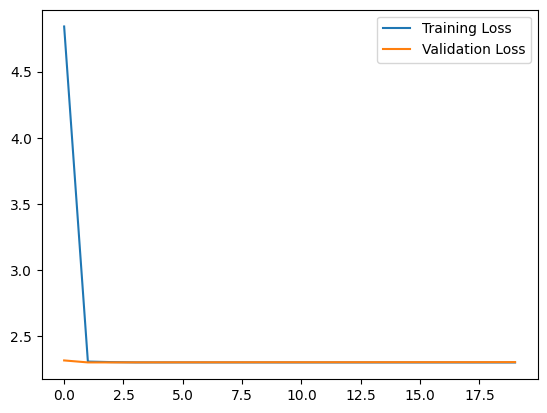

In [23]:
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [24]:
score = fc_model.evaluate(test_X, test_Y, verbose=1)
print('\nFully Connected Model Accuracy:', score[1], '\n')


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.0878 - loss: 2.3056

Fully Connected Model Accuracy: 0.09198113530874252 

